<a href="https://colab.research.google.com/github/LuisElRey/CursoPyton/blob/main/Comparacion_Rastring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mejor solución encontrada por Variante 1: [-0.19769117  0.96091961  0.92889134 -2.00127764  0.8558691   0.92507238
  1.00105427 -0.05454222  0.98401462 -1.0967584 ]
Valor de aptitud de la mejor solución por Variante 1: 25.98865
Mejor solución encontrada por Variante 2: [-1.00104551  0.96091961 -1.01786396 -0.05254607 -1.9815309  -1.03333233
  1.00105427 -0.05381109 -0.056622    1.0636022 ]
Valor de aptitud de la mejor solución por Variante 2: 13.26742


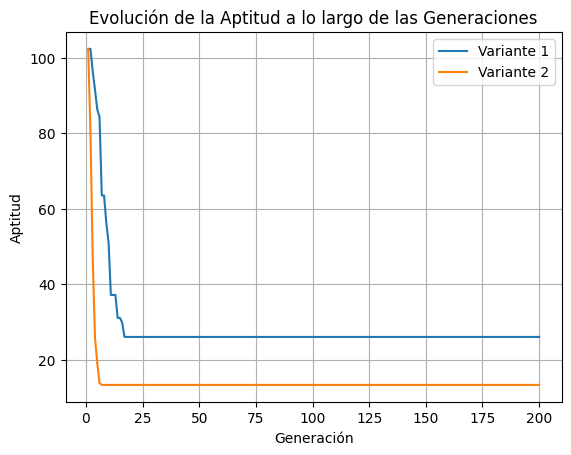

In [ ]:
#Se descargan las librerias correspondientes
import numpy as np
import matplotlib.pyplot as plt

# Definición de la función de Rastrigin
def rastrigin(x):
    A = 10
    return round(A * len(x) + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x]), 5)

# Función de generación de población inicial
def generate_population(pop_size, chromosome_length):
    return [np.random.uniform(-5.12, 5.12, chromosome_length) for _ in range(pop_size)]

# Variante 1
def genetic_algorithm_variant1(population, max_generations):
    best_fitnesses = []
    for _ in range(max_generations):
        # Evaluación de la población
        fitness_scores = [rastrigin(individual) for individual in population]
        best_fitnesses.append(min(fitness_scores))
        best_individual_index = np.argmin(fitness_scores)
        best_individual = population[best_individual_index]

        # Selección por torneo
        selected_parents = []
        for _ in range(len(population)):
            tournament_indices = np.random.choice(range(len(population)), size=2)
            tournament_fitness = [fitness_scores[i] for i in tournament_indices]
            selected_parents.append(population[tournament_indices[np.argmin(tournament_fitness)]])

        # Cruzamiento en dos puntos
        offspring = []
        for i in range(0, len(selected_parents), 2):
            parent1, parent2 = selected_parents[i], selected_parents[i+1]
            crossover_point1 = np.random.randint(len(parent1))
            crossover_point2 = np.random.randint(crossover_point1, len(parent1))
            child1 = np.concatenate((parent1[:crossover_point1], parent2[crossover_point1:crossover_point2], parent1[crossover_point2:]))
            child2 = np.concatenate((parent2[:crossover_point1], parent1[crossover_point1:crossover_point2], parent2[crossover_point2:]))
            offspring.extend([child1, child2])

        # Sustitución extintiva con elitismo
        population = offspring
        population[best_individual_index] = best_individual

    return best_individual, rastrigin(best_individual), best_fitnesses

# Variante 2
def genetic_algorithm_variant2(population, max_generations):
    best_fitnesses = []
    for _ in range(max_generations):
        # Evaluación de la población
        fitness_scores = [rastrigin(individual) for individual in population]
        best_fitnesses.append(min(fitness_scores))
        best_individual_index = np.argmin(fitness_scores)
        best_individual = population[best_individual_index]

        # Cruzamiento elitista
        offspring = []
        for parent1 in population:
            for parent2 in population:
                crossover_point1 = np.random.randint(len(parent1))
                crossover_point2 = np.random.randint(crossover_point1, len(parent1))
                child = np.concatenate((parent1[:crossover_point1], parent2[crossover_point1:crossover_point2], parent1[crossover_point2:]))
                offspring.append(child)

        # Sustitución elitista
        combined_population = population + offspring
        combined_fitness_scores = [rastrigin(individual) for individual in combined_population]
        sorted_indices = np.argsort(combined_fitness_scores)
        population = [combined_population[i] for i in sorted_indices[:len(population)]]

    return best_individual, rastrigin(best_individual), best_fitnesses

# Parámetros del algoritmo
population_size = 100
chromosome_length = 10
max_generations = 200

# Generación de población inicial
population = generate_population(population_size, chromosome_length)

# Ejecución de las variantes de algoritmo genético
best_solution1, best_fitness1, best_fitnesses1 = genetic_algorithm_variant1(population.copy(), max_generations)
best_solution2, best_fitness2, best_fitnesses2 = genetic_algorithm_variant2(population.copy(), max_generations)

print("Mejor solución encontrada por Variante 1:", best_solution1)
print("Valor de aptitud de la mejor solución por Variante 1:", best_fitness1)
print("Mejor solución encontrada por Variante 2:", best_solution2)
print("Valor de aptitud de la mejor solución por Variante 2:", best_fitness2)

# Graficacion los valores de aptitud a lo largo de las generaciones
plt.plot(range(1, max_generations + 1), best_fitnesses1, label='Variante 1')
plt.plot(range(1, max_generations + 1), best_fitnesses2, label='Variante 2')
plt.title('Evolución de la Aptitud a lo largo de las Generaciones')
plt.xlabel('Generación')
plt.ylabel('Aptitud')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
import numpy as np

# Lista de resultados
resultados = [-1.00104551, 0.96091961, -1.01786396, -0.05254607, -1.9815309,  -1.03333233, 1.00105427, -0.05381109, -0.056622, 1.0636022 ]

# Peor solución
peor_solucion = min(resultados)

# Media
media = np.mean(resultados)

# Desviación estándar
desviacion_estandar = np.std(resultados)

print("Mejor solución encontrada:", max(resultados))
print("Peor solución encontrada:", peor_solucion)
print("Media de las soluciones:", media)
print("Desviación estándar de las soluciones:", desviacion_estandar)


Mejor solución encontrada: 1.0636022
Peor solución encontrada: -1.9815309
Media de las soluciones: -0.21711757799999995
Desviación estándar de las soluciones: 0.9811507377180265
